# Correlation of "Citizens' Evaluations About Foreign Movies" in The Shade of "Governments' Official Policy"
## A Study of in The Example of US Citizens Voting about Iranian and Russian Movies

This study is an assignment (7th week) of "Coursera - Improving Your Statistical Inferences Course" by Daniël Lakens (Eindhoven University of Technology). Assignment instruction specified that "the data collection will consist of movie ratings on the IMDB". So the study was taken shape from the instructions.

### Hypothesis

My theoretical hypothesis is; "__The evaluations of citizens’ voting about foreign movies are not influenced by the governments' official policy"__.

### Collecting Data

Because of the exhaustive hypothesis, it is not easy to collect data. So I decided to restrict the hypothesis in the example of the US and its politically affair tense countries; Russia and Iran. I used “the ratings of US citizens about Iranian and Russian movies” and “the ratings of Non-US people about Iranian and Russian movies” data from IMDB.
 
We need two data, which are the rating data of US citizens and Non-US people about Iranian and Russian movies. At IMDB, these (and ofcourse more over) data exist for every movies. We can see that 15.115 Russian and 6.923 Iranian movies exist at IMDB as of 08.09.2019. To prevent the noise, avoid the falsity and reach the healthy result; __only the movies were taken into account,  which has 5000 or more votes__. As a result, our population decrease to “the rating data of 99 (37 Iranian, 62 Russian) movies”. So, instead of taking sample I prefer to studying with the population data.

__The data were scraped from imdb.com with Python BeautifulSoup library.__


In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
from bs4 import BeautifulSoup
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
url='https://www.imdb.com/search/title/?num_votes=5000,&countries=ir'
request = requests.get(url)
soup = BeautifulSoup(request.content,'lxml')
data=soup.find_all("div",{"class":"lister-item-content"})
df=pd.DataFrame(columns=['Name','MovieLink','USVotingLink','NonUSVotingLink','USVotingList','NonUSVotingList',
                        'USVotingMean','NonUSVotingMean','USVotingSTD','NonUSVotingSTD','PValue'])
for movie in data:
    movie_name=movie.find("a").text
    movie_link=movie.find("a")['href']
    us_voting_link='https://www.imdb.com'+movie_link+'ratings?demo=us_users'
    non_us_voting_link='https://www.imdb.com'+movie_link+'ratings?demo=non_us_users'
    movie_link='https://www.imdb.com'+movie_link
    df=df.append(pd.DataFrame([[movie_name,movie_link,us_voting_link,non_us_voting_link,'','','','','','','']],columns=df.columns))
df=df.reset_index(drop=True)
df.head()

,Name,MovieLink,USVotingLink,NonUSVotingLink,USVotingList,NonUSVotingList,USVotingMean,NonUSVotingMean,USVotingSTD,NonUSVotingSTD,PValue
0,A Separation,https://www.imdb.com/title/tt1832382/,https://www.imdb.com/title/tt1832382/ratings?d...,https://www.imdb.com/title/tt1832382/ratings?d...,,,,,,,
1,Bacheha-Ye aseman,https://www.imdb.com/title/tt0118849/,https://www.imdb.com/title/tt0118849/ratings?d...,https://www.imdb.com/title/tt0118849/ratings?d...,,,,,,,
2,Forushande,https://www.imdb.com/title/tt5186714/,https://www.imdb.com/title/tt5186714/ratings?d...,https://www.imdb.com/title/tt5186714/ratings?d...,,,,,,,
3,Under the Shadow,https://www.imdb.com/title/tt4273292/,https://www.imdb.com/title/tt4273292/ratings?d...,https://www.imdb.com/title/tt4273292/ratings?d...,,,,,,,
4,Mulan II,https://www.imdb.com/title/tt0279967/,https://www.imdb.com/title/tt0279967/ratings?d...,https://www.imdb.com/title/tt0279967/ratings?d...,,,,,,,


We prefer to collect all voting ranks in two groups (US and Non-US). So, we scrape the voting details data from IMDB and set them in a list. With this process, it is possible to calculate the mean, std and / or p-value with this dataset. But of course, this is not a compulsory phase.

In [2]:
link_list=list(df)[2:4]
voting_list=list(df)[4:6]
for m in range(2):
    for n in range(df.shape[0]):
        url_us=df.loc[n,link_list[m]] 
        request = requests.get(url_us)
        soup = BeautifulSoup(request.content,'html.parser')
        data_vote=soup.find_all('div',{"class":"leftAligned"})
        data_vote=data_vote[1:11]
        liste=[]
        for i,vote in enumerate(data_vote):
            vote=vote.text
            vote=vote.replace(",","")
            vote=int(vote)
            vote_list=[10-i]*vote
            liste.extend(vote_list)
        df.loc[n,voting_list[m]]=liste
        #print('The data from {} are scraped and saved to dataframe'.format(url_us))
    print('The all data of {} are scraped and saved to dataframe'.format(link_list[m]))
df.head()

The all data of USVotingLink are scraped and saved to dataframe
The all data of NonUSVotingLink are scraped and saved to dataframe


,Name,MovieLink,USVotingLink,NonUSVotingLink,USVotingList,NonUSVotingList,USVotingMean,NonUSVotingMean,USVotingSTD,NonUSVotingSTD,PValue
0,A Separation,https://www.imdb.com/title/tt1832382/,https://www.imdb.com/title/tt1832382/ratings?d...,https://www.imdb.com/title/tt1832382/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",,,,,
1,Bacheha-Ye aseman,https://www.imdb.com/title/tt0118849/,https://www.imdb.com/title/tt0118849/ratings?d...,https://www.imdb.com/title/tt0118849/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",,,,,
2,Forushande,https://www.imdb.com/title/tt5186714/,https://www.imdb.com/title/tt5186714/ratings?d...,https://www.imdb.com/title/tt5186714/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",,,,,
3,Under the Shadow,https://www.imdb.com/title/tt4273292/,https://www.imdb.com/title/tt4273292/ratings?d...,https://www.imdb.com/title/tt4273292/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",,,,,
4,Mulan II,https://www.imdb.com/title/tt0279967/,https://www.imdb.com/title/tt0279967/ratings?d...,https://www.imdb.com/title/tt0279967/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",,,,,


### Calculating The Statistical Values
It is seen that in the first 6 columns' data were scraped from the IMDB. Because we want to learn the mean, standard deviation (std) and p-value of the data, we calculate them by Python NumPy library in 5 different columns.

In [3]:
for n in range(df.shape[0]):   
    df.loc[n,'USVotingMean']=np.mean(df.loc[n,'USVotingList'])
    df.loc[n,'NonUSVotingMean']=np.mean(df.loc[n,'NonUSVotingList'])
    df.loc[n,'USVotingSTD']=np.std(df.loc[n,'USVotingList'])
    df.loc[n,'NonUSVotingSTD']=np.std(df.loc[n,'NonUSVotingList'])
    df.loc[n,'PValue'] = stats.ttest_ind(df.loc[n,'USVotingList'],df.loc[n,'NonUSVotingList'])[1]
df.head()

,Name,MovieLink,USVotingLink,NonUSVotingLink,USVotingList,NonUSVotingList,USVotingMean,NonUSVotingMean,USVotingSTD,NonUSVotingSTD,PValue
0,A Separation,https://www.imdb.com/title/tt1832382/,https://www.imdb.com/title/tt1832382/ratings?d...,https://www.imdb.com/title/tt1832382/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",8.03545,8.34759,1.98176,1.66008,4.14829e-113
1,Bacheha-Ye aseman,https://www.imdb.com/title/tt0118849/,https://www.imdb.com/title/tt0118849/ratings?d...,https://www.imdb.com/title/tt0118849/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",7.74381,8.3458,2.07877,1.66477,9.70122e-134
2,Forushande,https://www.imdb.com/title/tt5186714/,https://www.imdb.com/title/tt5186714/ratings?d...,https://www.imdb.com/title/tt5186714/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",7.82697,7.74373,1.77069,1.54667,0.00408239
3,Under the Shadow,https://www.imdb.com/title/tt4273292/,https://www.imdb.com/title/tt4273292/ratings?d...,https://www.imdb.com/title/tt4273292/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",6.85688,6.83471,1.83704,1.63878,0.575997
4,Mulan II,https://www.imdb.com/title/tt0279967/,https://www.imdb.com/title/tt0279967/ratings?d...,https://www.imdb.com/title/tt0279967/ratings?d...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",5.70317,5.81488,2.3083,1.96432,0.00907469


### Interpreting The Data
After calculating the mean and standard deviation (std) of the US and Non-US ratings about Iranian movies, we can pass the interpreting phase. To understand "__if a meaningful correlation exists between two data or not__", we calculate the __Pearson's r__. As we know, Pearson's r is one of the most commonly reported correlation coefficient value in statistics. In our study, we reach the __0.9233691632171431__ The Pearson's r-value. In <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/table/tbl1/">many studies</a>, it was accepted that the value of 0.9 or above is the sign of the strong correlations between variables. So, this correlation value supports our hypothesis.

<img src="https://github.com/msklc/Define-a-Statistical-Hypothesis-with-IMDB-Movie-Ranking-Data/blob/master/corr.png?raw=true" width="800">



In [4]:
df[['USVotingMean','NonUSVotingMean']] = df[['USVotingMean','NonUSVotingMean']].astype(float) #change two columns type as float
corr=df['USVotingMean'].corr(df['NonUSVotingMean'],method ='pearson')
print("The Pearson's r value of the US and Non-US ratings about Iranian movies is: {}".format(corr))

The Pearson's r value of the US and Non-US ratings about Iranian movies is: 0.9232748921236653


To better understing of the correlation, we can visualizing the result. While modeling the relationship between two data, we prefer to use linear regression. With the help of Python seaborn library, we can see clearly the strong correlation as a positive linear between two data.

C:\Users\WIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Relationship of The US and Non-US Ratings About Iranian Movies')

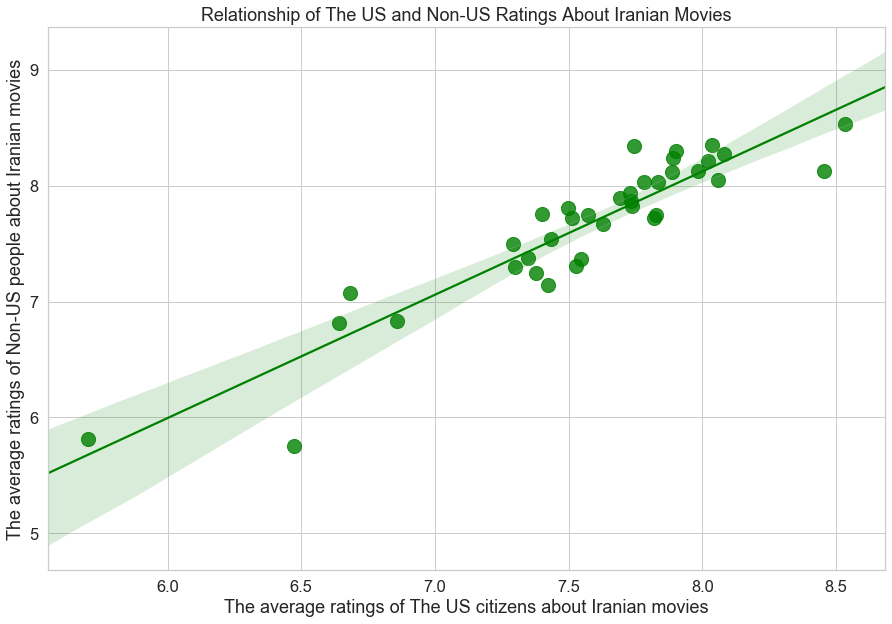

In [5]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='USVotingMean', y='NonUSVotingMean', data=df, color='green', scatter_kws={'s': 200})
ax.set(xlabel='The average ratings of The US citizens about Iranian movies', 
       ylabel='The average ratings of Non-US people about Iranian movies')
ax.set_title('Relationship of The US and Non-US Ratings About Iranian Movies')

### Result and Evaluation
- Our theoretical hypothesis is; "The evaluations of citizens’ voting about foreign movies are not influenced by the governments' official policy".
- We restrict the hypothesis in the example of the US and its politically affair tense countries; Russia and Iran.
- In the study, “the ratings of US citizens about Iranian and Russian movies” and “the ratings of Non-US people about Iranian and Russian movies” data were used.
- Data were scraped from IMDB by Python BeautifulSoup library.
- The statistical values are calculated by Python NumPy library.
- __In the study, we reach 0.9233691632171431 The Pearson's r-value__ with the data of The US and Non-US Ratings About Iranian Movies.
- __We also reach 0.96001528325696 Pearson's r-value__ with the ata of The US and Non-US Ratings About Russian Movies.
- 0.9 or above of The Pearson's r-value is signed the strong correlations between variables.
- __So, this strong correlation value supports our hypothesis.__


In [6]:
df.to_excel('Iranian_imdb_{}.xlsx'.format(datetime.datetime.now().strftime('%d.%m.%Y_%H.%M')))
# Because of some columns has long array, we prefer to save .xlsx file instead of .csv file